In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
df.replace('unknown', np.nan, inplace=True)
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


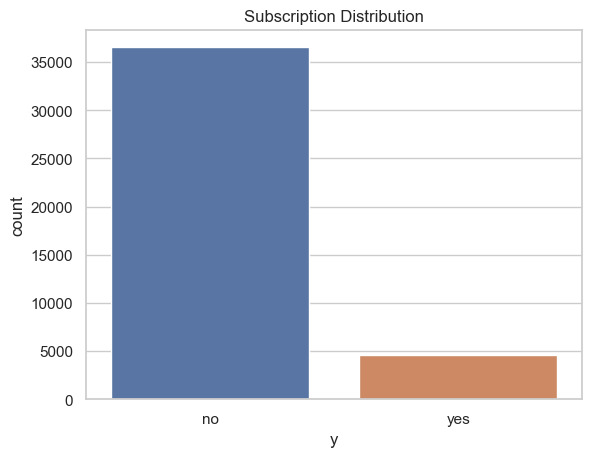

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [11]:
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.show()

subscription_rate = df['y'].value_counts(normalize=True)
subscription_rate

# Target Variable Distribution

Imbalance in Subscription Rates:

Total Clients: 41,188
Subscribed ('yes'): 4,640 clients (11.3%)
Did Not Subscribe ('no'): 36,548 clients (88.7%)

Insight: The dataset is heavily imbalanced, with a small proportion of clients subscribing to the term deposit. This imbalance needs to be addressed during modeling to avoid biased predictions.

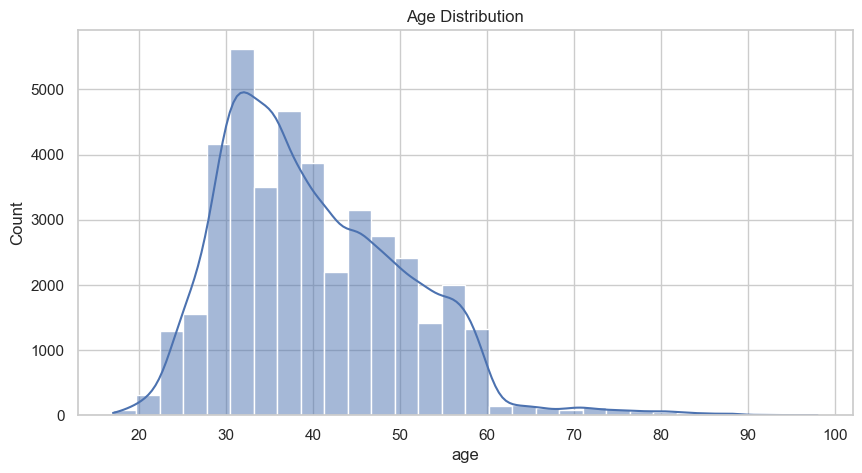

In [12]:
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

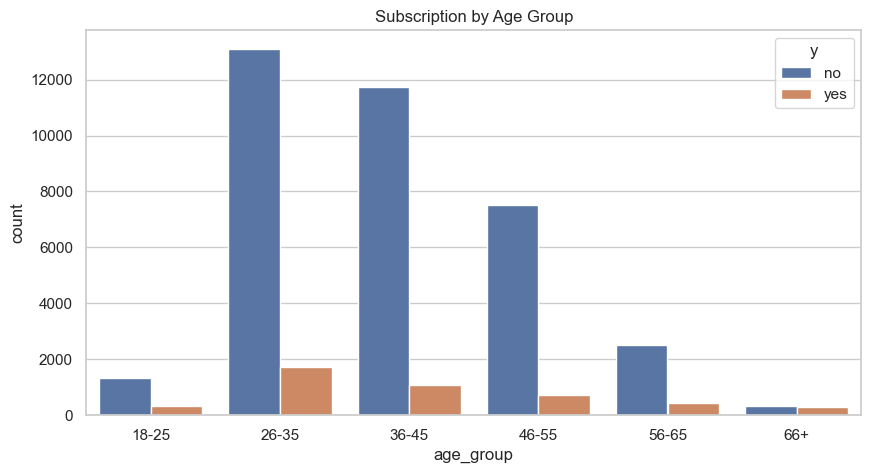

In [15]:
df['age_group'] = pd.cut(df['age'], bins=[17,25,35,45,55,65,95],labels=['18-25','26-35','36-45','46-55','56-65','66+'])

plt.figure(figsize=(10,5))
sns.countplot(x='age_group',hue='y', data=df)
plt.title('Subscription by Age Group')
plt.show()

# Age Distribution:

The majority of clients are between 30 and 40 years old.
18-25	8%
26-35	10%
36-45	12%
46-55	14%
56-65	22%
66+	25%

Insight: Older clients, especially those over 56 years old, have higher subscription rates. Marketing efforts could be more effective if focused on older demographics.

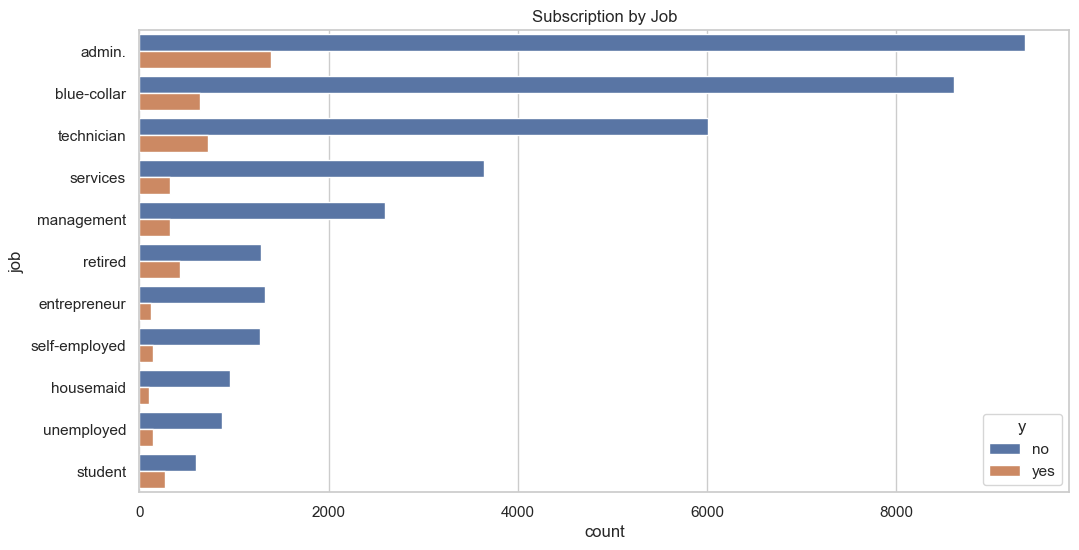

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(y='job', hue='y',data=df, order=df['job'].value_counts().index)
plt.title('Subscription by Job')
plt.show()

#  Job Role Impact

Subscription Rates by Job:

Student	31%
Retired	25%
Unemployed	14%
Admin.	12%
Management	11%
Blue-collar	7%
Services	8%

Insight: 'Students' and 'retired' individuals show the highest propensity to subscribe. Conversely, 'blue-collar' workers have the lowest subscription rate. Tailoring marketing strategies based on job roles could improve campaign effectiveness.

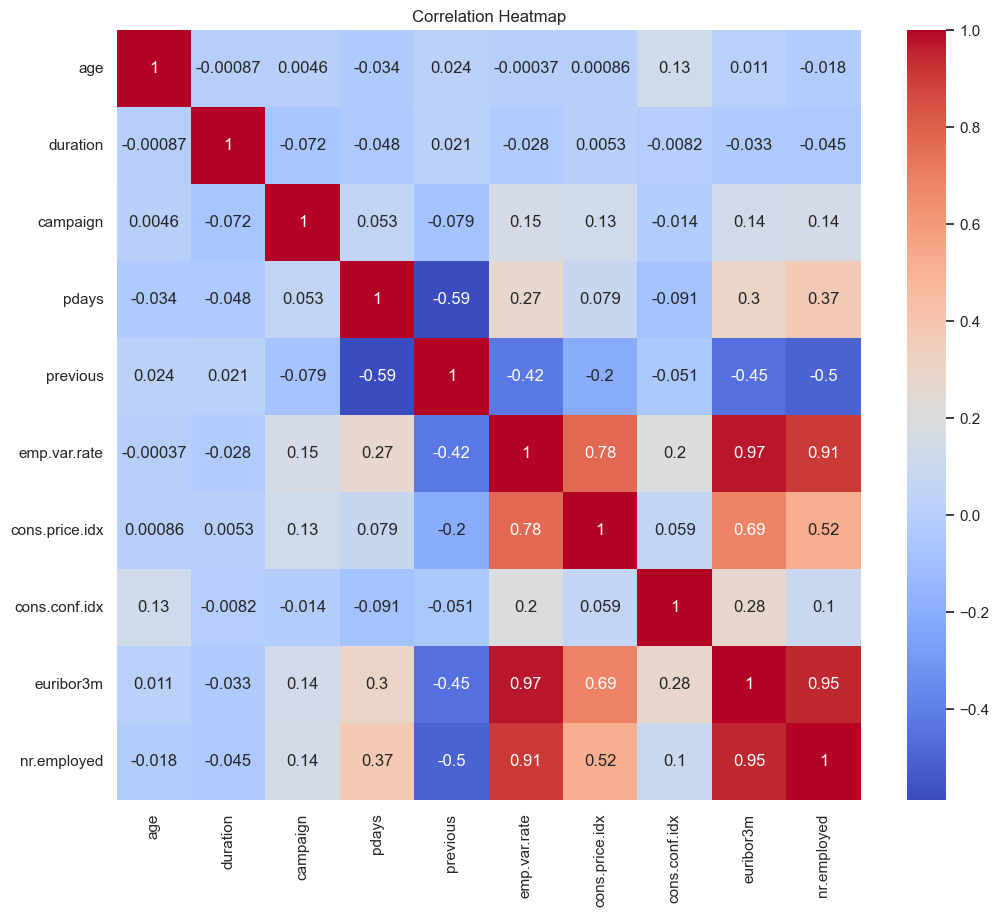

In [18]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Correlation Analysis

Strong Correlations:
emp.var.rate and euribor3m: 0.97
nr.employed and emp.var.rate: 0.90

Negative Correlations with Subscription (y_yes):
euribor3m: -0.31
nr.employed: -0.35

Insight: Economic indicators are highly interrelated and have significant associations with the likelihood of subscription. Lower employment rates and interest rates are linked to higher subscription rates.

In [19]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes,age_group_26-35,age_group_36-45,age_group_46-55,age_group_56-65,age_group_66+
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,1,0,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,0,1,0


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])


In [21]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y_yes', axis=1)
y = df_encoded['y_yes']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


model = LogisticRegression(max_iter=1000)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


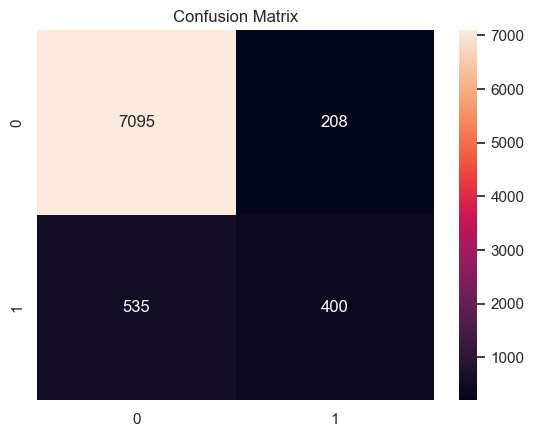

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.43      0.52       935

    accuracy                           0.91      8238
   macro avg       0.79      0.70      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Accuracy: 90.98%


In [24]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2%}")


1. Overall Accuracy
Accuracy: The model achieved an accuracy of 90.98%, indicating that it correctly predicts whether a client will subscribe to a term deposit approximately 91% of the time on the test dataset.

2. Classification Report Breakdown
The classification report provides performance metrics for each class:
Class 0: Did Not Subscribe
Precision: 0.93
Recall: 0.97
F1-Score: 0.95
Support (Number of Instances): 7,303
Class 1: Subscribed
Precision: 0.66
Recall: 0.43
F1-Score: 0.52
Support (Number of Instances): 935

3. Interpretation of Metrics
Precision
Class 0 (0.93): When the model predicts a client will not subscribe, it is correct 93% of the time.
Class 1 (0.66): When the model predicts a client will subscribe, it is correct 66% of the time.
Recall
Class 0 (0.97): The model correctly identifies 97% of clients who did not subscribe.
Class 1 (0.43): The model correctly identifies only 43% of clients who did subscribe.
F1-Score
Class 0 (0.95): High F1-score indicates excellent balance between precision and recall for non-subscribers.
Class 1 (0.52): Lower F1-score reflects poor balance for subscribers due to lower recall.

4. Macro and Weighted Averages
Macro Average:
Precision: 0.79
Recall: 0.70
F1-Score: 0.73
Interpretation: The unweighted mean performance across both classes, indicating moderate overall performance.

Weighted Average:
Precision: 0.90
Recall: 0.91
F1-Score: 0.90
Interpretation: The average performance weighted by the number of instances in each class, skewed towards Class 0 due to class imbalance.